# Load packages and data

In [1]:
# install.packages("lubridate", repos = "http://cran.us.r-project.org")
library(lubridate)
library(forecast)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
sales.df <- read.csv('SplitBanana.csv')

# Inspect and clean the data

In [3]:
print(sales.df[1:20, ])
print(tail(sales.df))

        Date   Sales Salesimp Jams Salesadj
1  3/17/2008  823.45   823.45    0   823.45
2  3/18/2008  716.55   716.55    0   716.55
3  3/19/2008  630.83   630.83    0   630.83
4  3/20/2008  775.83   775.83    0   775.83
5  3/21/2008  967.60   967.60    0   967.60
6  3/22/2008 1202.95  1202.95    0  1202.95
7  3/23/2008  701.25   701.25    0   701.25
8  3/24/2008      NA   584.11    0   584.11
9  3/25/2008  486.66   486.66    0   486.66
10 3/26/2008  732.08   732.08    0   732.08
11 3/27/2008  724.31   724.31    0   724.31
12 3/28/2008  335.78   335.78    0   335.78
13 3/29/2008 1067.94  1067.94    0  1067.94
14 3/30/2008 1268.95  1268.95    0  1268.95
15 3/31/2008  344.77   344.77    0   344.77
16  4/1/2008  650.24   650.24    0   650.24
17  4/2/2008  793.73   793.73    0   793.73
18  4/3/2008  434.07   434.07    0   434.07
19  4/4/2008 1215.51  1215.51    0  1215.51
20  4/5/2008 1286.68  1286.68    0  1286.68
          Date   Sales Salesimp Jams Salesadj
2201 3/26/2014  502.41   502.4

Check the class of the Date column. What class is it initially? Rerun the lines directly below and above after you run the reformatting line below.

In [4]:
class(sales.df$Date)

[1] "factor"

Reformat the Date column so that R recognizes it formally as a "Date" variable, rather than a "factor" variable. The lubridate package needs the Date column to be of class "Date". A function from the lubridate package is used below to extract a new feature from the Date column.

In [5]:
sales.df$Date <- as.Date(sales.df$Date, format = "%m/%d/%Y")

# Create new features

Create a new feature (or new column) called "Month", using the "month" function in the lubridate package.

In [6]:
sales.df$Month <- month(sales.df$Date, label = TRUE, abbr = TRUE)

Create dummy variables for each month using the model.matrix function.  The "+ 0" in the formula will make sure that an intercept (a column of all 1's) is not included in the matrix and that one of the dummies is not automatically dropped.

In [7]:
Month.dummies <- model.matrix(~ 0 + Month, data = sales.df)
print(Month.dummies[1:20, ])

   MonthJan MonthFeb MonthMar MonthApr MonthMay MonthJun MonthJul MonthAug
1         0        0        1        0        0        0        0        0
2         0        0        1        0        0        0        0        0
3         0        0        1        0        0        0        0        0
4         0        0        1        0        0        0        0        0
5         0        0        1        0        0        0        0        0
6         0        0        1        0        0        0        0        0
7         0        0        1        0        0        0        0        0
8         0        0        1        0        0        0        0        0
9         0        0        1        0        0        0        0        0
10        0        0        1        0        0        0        0        0
11        0        0        1        0        0        0        0        0
12        0        0        1        0        0        0        0        0
13        0        0     

Interact the variables Month and Jams. Use ":" in the model.matrix function to interact two variables. In which months did Jams occur? How many Jams occurred in each of these months?

In [8]:
MonthJams.dummies <- model.matrix(~ 0 + Month:Jams, data = sales.df)
print(MonthJams.dummies[1:20, ])
colSums(MonthJams.dummies)

   MonthJan:Jams MonthFeb:Jams MonthMar:Jams MonthApr:Jams MonthMay:Jams
1              0             0             0             0             0
2              0             0             0             0             0
3              0             0             0             0             0
4              0             0             0             0             0
5              0             0             0             0             0
6              0             0             0             0             0
7              0             0             0             0             0
8              0             0             0             0             0
9              0             0             0             0             0
10             0             0             0             0             0
11             0             0             0             0             0
12             0             0             0             0             0
13             0             0             0       

MonthJan:Jams MonthFeb:Jams MonthMar:Jams MonthApr:Jams MonthMay:Jams 
            0             0             0             0             6 
MonthJun:Jams MonthJul:Jams MonthAug:Jams MonthSep:Jams MonthOct:Jams 
            0             0             2             4             0 
MonthNov:Jams MonthDec:Jams 
            0             0

In [9]:
sales.df$Weekday <- weekdays(sales.df$Date,  abbreviate = TRUE)
Weekday.dummies <- model.matrix(~ 0 + Weekday, data = sales.df)
print(Weekday.dummies[1:20, ])

   WeekdayFri WeekdayMon WeekdaySat WeekdaySun WeekdayThu WeekdayTue WeekdayWed
1           0          1          0          0          0          0          0
2           0          0          0          0          0          1          0
3           0          0          0          0          0          0          1
4           0          0          0          0          1          0          0
5           1          0          0          0          0          0          0
6           0          0          1          0          0          0          0
7           0          0          0          1          0          0          0
8           0          1          0          0          0          0          0
9           0          0          0          0          0          1          0
10          0          0          0          0          0          0          1
11          0          0          0          0          1          0          0
12          1          0          0     

In [10]:
WeekdayJams.dummies <- model.matrix(~ 0 + Weekday:Jams, data = sales.df)
print(WeekdayJams.dummies[1:20, ])
colSums(WeekdayJams.dummies)

   WeekdayFri:Jams WeekdayMon:Jams WeekdaySat:Jams WeekdaySun:Jams
1                0               0               0               0
2                0               0               0               0
3                0               0               0               0
4                0               0               0               0
5                0               0               0               0
6                0               0               0               0
7                0               0               0               0
8                0               0               0               0
9                0               0               0               0
10               0               0               0               0
11               0               0               0               0
12               0               0               0               0
13               0               0               0               0
14               0               0               0            

WeekdayFri:Jams WeekdayMon:Jams WeekdaySat:Jams WeekdaySun:Jams WeekdayThu:Jams 
              0               0              12               0               0 
WeekdayTue:Jams WeekdayWed:Jams 
              0               0

# Create training and validation sets

Create the dependent variable.

In [11]:
y <- sales.df$Salesimp

Put all your features into a single data frame. 

Because we will fit a linear regression model below, we manually remove one month's dummy variable, Dec. This removal will avoid multicollinearity, i.e., perfect correlation between a variable and a set of other variables. Multicollinearity causes a problem for linear regression. For other more advanced models, this removal is not necessary. 

Also, include only the MonthJams dummies for months in which Jams occurred. Including a variable that is always 0 cannot be a useful predictor.

In [12]:
x <- as.data.frame(cbind(Month.dummies[, -12], MonthJams.dummies[, c(5, 8, 9)], Weekday.dummies[,-7],WeekdayJams.dummies[, c(3,4)]))
colnames(x) <- gsub("Month", "", colnames(x)) # Remove the "Month" from the column names.
colnames(x) <- gsub(":", "", colnames(x)) # Remove the ":" from the column names.
colnames(x) <- gsub("Weekday", "", colnames(x)) # Remove the "Weekday" from the column names.
x<- x[,-22]
print(x[1:20, ])



   Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov MayJams AugJams SepJams Fri Mon
1    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   1
2    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
3    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
4    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
5    0   0   1   0   0   0   0   0   0   0   0       0       0       0   1   0
6    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
7    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
8    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   1
9    0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
10   0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
11   0   0   1   0   0   0   0   0   0   0   0       0       0       0   0   0
12   0   0   1   0   0   0   0   0   0   0   0      

In [13]:
#Weekday * Month interations
MonthWeekday.dummies <- model.matrix(~ 0 + Month:Weekday, data = sales.df)
print(MonthWeekday.dummies[1:20, ])
colSums(MonthWeekday.dummies)

   MonthJan:WeekdayFri MonthFeb:WeekdayFri MonthMar:WeekdayFri
1                    0                   0                   0
2                    0                   0                   0
3                    0                   0                   0
4                    0                   0                   0
5                    0                   0                   1
6                    0                   0                   0
7                    0                   0                   0
8                    0                   0                   0
9                    0                   0                   0
10                   0                   0                   0
11                   0                   0                   0
12                   0                   0                   1
13                   0                   0                   0
14                   0                   0                   0
15                   0                   0             

MonthJan:WeekdayFri MonthFeb:WeekdayFri MonthMar:WeekdayFri MonthApr:WeekdayFri 
                 27                  24                  28                  26 
MonthMay:WeekdayFri MonthJun:WeekdayFri MonthJul:WeekdayFri MonthAug:WeekdayFri 
                 27                  25                  27                  27 
MonthSep:WeekdayFri MonthOct:WeekdayFri MonthNov:WeekdayFri MonthDec:WeekdayFri 
                 25                  27                  26                  26 
MonthJan:WeekdayMon MonthFeb:WeekdayMon MonthMar:WeekdayMon MonthApr:WeekdayMon 
                 26                  24                  30                  26 
MonthMay:WeekdayMon MonthJun:WeekdayMon MonthJul:WeekdayMon MonthAug:WeekdayMon 
                 26                  26                  26                  27 
MonthSep:WeekdayMon MonthOct:WeekdayMon MonthNov:WeekdayMon MonthDec:WeekdayMon 
                 26                  26                  26                  27 
MonthJan:WeekdaySat MonthFeb:WeekdaySat MonthMar:WeekdaySat MonthApr:WeekdaySat 
                 27                  24                  29                  25 
MonthMay:WeekdaySat MonthJun:WeekdaySat MonthJul:WeekdaySat MonthAug:WeekdaySat 
                 27                  26                  26                  27 
MonthSep:WeekdaySat MonthOct:WeekdaySat MonthNov:WeekdaySat MonthDec:WeekdaySat 
                 25                  27                  26                  26 
MonthJan:WeekdaySun MonthFeb:WeekdaySun MonthMar:WeekdaySun MonthApr:WeekdaySun 
                 27                  24                  29                  25 
MonthMay:WeekdaySun MonthJun:WeekdaySun MonthJul:WeekdaySun MonthAug:WeekdaySun 
                 27                  26                  26                  27 
MonthSep:WeekdaySun MonthOct:WeekdaySun MonthNov:WeekdaySun MonthDec:WeekdaySun 
                 26                  26                  26                  26 
MonthJan:WeekdayThu MonthFeb:WeekdayThu MonthMar:WeekdayThu MonthApr:WeekdayThu 
                 27                  24                  28                  26 
MonthMay:WeekdayThu MonthJun:WeekdayThu MonthJul:WeekdayThu MonthAug:WeekdayThu 
                 27                  25                  27                  26 
MonthSep:WeekdayThu MonthOct:WeekdayThu MonthNov:WeekdayThu MonthDec:WeekdayThu 
                 26                  27                  25                  27 
MonthJan:WeekdayTue MonthFeb:WeekdayTue MonthMar:WeekdayTue MonthApr:WeekdayTue 
                 26                  24                  29                  26 
MonthMay:WeekdayTue MonthJun:WeekdayTue MonthJul:WeekdayTue MonthAug:WeekdayTue 
                 26                  26                  27                  26 
MonthSep:WeekdayTue MonthOct:WeekdayTue MonthNov:WeekdayTue MonthDec:WeekdayTue 
                 26                  26                  26                  27 
MonthJan:WeekdayWed MonthFeb:WeekdayWed MonthMar:WeekdayWed MonthApr:WeekdayWed 
                 26                  25                  28                  26 
MonthMay:WeekdayWed MonthJun:WeekdayWed MonthJul:WeekdayWed MonthAug:WeekdayWed 
                 26                  26                  27                  26 
MonthSep:WeekdayWed MonthOct:WeekdayWed MonthNov:WeekdayWed MonthDec:WeekdayWed 
                 26                  27                  25                  27

In [14]:
x <- as.data.frame(cbind(MonthWeekday.dummies[, -84], MonthJams.dummies[, c(5, 8, 9)]))
colnames(x) <- gsub("Month", "", colnames(x)) # Remove the "Month" from the column names.
colnames(x) <- gsub(":", "", colnames(x)) # Remove the ":" from the column names.
colnames(x) <- gsub("Weekday", "", colnames(x)) # Remove the "Weekday" from the column names.
print(x[1:20, ])

   JanFri FebFri MarFri AprFri MayFri JunFri JulFri AugFri SepFri OctFri NovFri
1       0      0      0      0      0      0      0      0      0      0      0
2       0      0      0      0      0      0      0      0      0      0      0
3       0      0      0      0      0      0      0      0      0      0      0
4       0      0      0      0      0      0      0      0      0      0      0
5       0      0      1      0      0      0      0      0      0      0      0
6       0      0      0      0      0      0      0      0      0      0      0
7       0      0      0      0      0      0      0      0      0      0      0
8       0      0      0      0      0      0      0      0      0      0      0
9       0      0      0      0      0      0      0      0      0      0      0
10      0      0      0      0      0      0      0      0      0      0      0
11      0      0      0      0      0      0      0      0      0      0      0
12      0      0      1      0      0   

Split the x and y variables into to two sets: 5+ years for training and one year for validation. 

In [15]:
nTotal <- length(y)
nValid <- 365
nTrain <- nTotal - nValid
xTrain <- x[1:nTrain, ]
yTrain <- y[1:nTrain]
xValid <- x[(nTrain + 1):nTotal, ]
yValid <- y[(nTrain + 1):nTotal]

# Fit a linear model and generate forecasts

Fit a linear regression model, using the "time series linear model" (tslm) function from the forecast package. To do so, create a time series object out of the sales in the training set. The x's for the model are in the data frame xTrain. Use the function "as.formula" to create a formula of the type y ~ x_1 + x_2 + ... + x_p. Include "trend" in this formula. The function tslm automatically recognizes "trend" as a sequence from 1 to nTrain, in increments of 1.

In [16]:
yTrain.ts <- ts(yTrain)

In [17]:
(formula <- as.formula(paste("yTrain.ts", paste(c("trend", colnames(xTrain)), collapse = "+"), sep = "~")))

yTrain.ts ~ trend + JanFri + FebFri + MarFri + AprFri + MayFri + 
    JunFri + JulFri + AugFri + SepFri + OctFri + NovFri + DecFri + 
    JanMon + FebMon + MarMon + AprMon + MayMon + JunMon + JulMon + 
    AugMon + SepMon + OctMon + NovMon + DecMon + JanSat + FebSat + 
    MarSat + AprSat + MaySat + JunSat + JulSat + AugSat + SepSat + 
    OctSat + NovSat + DecSat + JanSun + FebSun + MarSun + AprSun + 
    MaySun + JunSun + JulSun + AugSun + SepSun + OctSun + NovSun + 
    DecSun + JanThu + FebThu + MarThu + AprThu + MayThu + JunThu + 
    JulThu + AugThu + SepThu + OctThu + NovThu + DecThu + JanTue + 
    FebTue + MarTue + AprTue + MayTue + JunTue + JulTue + AugTue + 
    SepTue + OctTue + NovTue + DecTue + JanWed + FebWed + MarWed + 
    AprWed + MayWed + JunWed + JulWed + AugWed + SepWed + OctWed + 
    NovWed + MayJams + AugJams + SepJams

In [18]:
sales.tslm <- tslm(formula, data = xTrain)
summary(sales.tslm)


Call:
tslm(formula = formula, data = xTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-877.48 -105.49  -14.69   94.71  928.86 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.155e+02  4.055e+01   5.315 1.21e-07 ***
trend        1.156e-01  8.513e-03  13.576  < 2e-16 ***
JanFri       1.639e+01  5.681e+01   0.288 0.772999    
FebFri       1.505e+02  5.825e+01   2.584 0.009849 ** 
MarFri       3.557e+02  5.559e+01   6.399 2.00e-10 ***
AprFri       6.773e+02  5.683e+01  11.919  < 2e-16 ***
MayFri       6.960e+02  5.684e+01  12.246  < 2e-16 ***
JunFri       7.828e+02  5.750e+01  13.615  < 2e-16 ***
JulFri       8.397e+02  5.618e+01  14.947  < 2e-16 ***
AugFri       7.598e+02  5.681e+01  13.375  < 2e-16 ***
SepFri       5.637e+02  5.749e+01   9.805  < 2e-16 ***
OctFri       4.280e+02  5.617e+01   7.619 4.16e-14 ***
NovFri       2.941e+02  5.749e+01   5.116 3.47e-07 ***
DecFri       7.853e+01  5.681e+01   1.382 0.167013    
JanMon      -1.329e+

Generate forecasts for the validation set and evaluate the accuracy of these forecasts.

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.451733e-14,2.853713e+02,2.200157e+02,-2.577315e+01,4.797002e+01,9.097664e-01,3.934395e-01
Test set,31.120317,340.011360,263.055865,-20.967342,45.660055,1.087738,NA


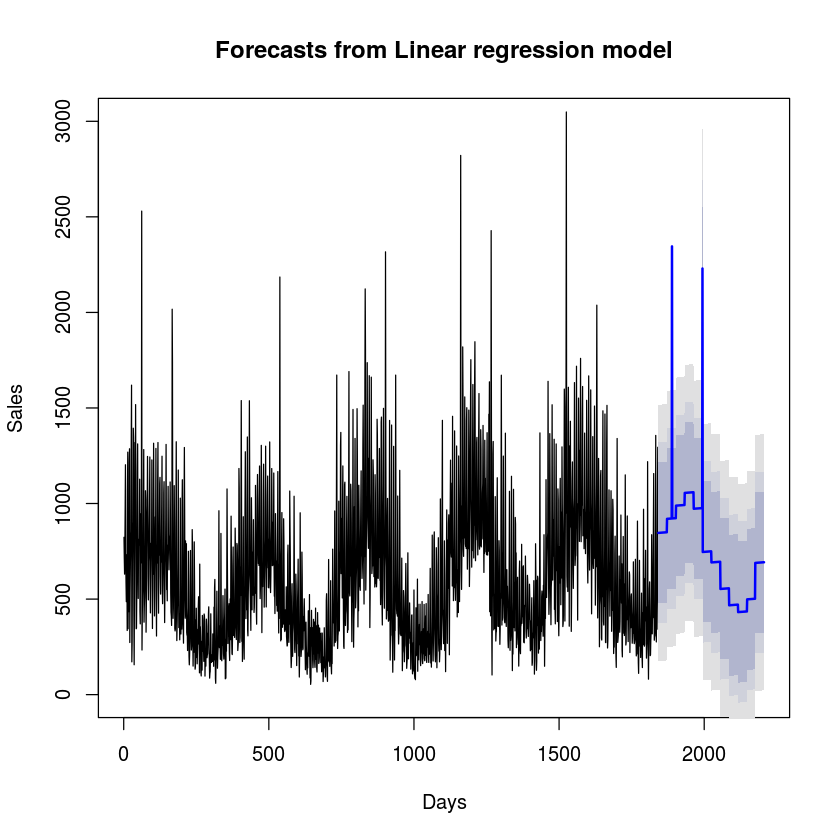

In [18]:
sales.tslm.pred <-  forecast(sales.tslm, newdata = xValid, level = c(80, 90, 98))
accuracy(sales.tslm.pred, yValid) 
plot(sales.tslm.pred, xlab = "Days", ylab = "Sales", ylim = c(0, 3000))

Extract the upper limits of the three forecast cones for June in the validation set and write them out to a csv. When the level in the forecast function is set to "c(80, 90, 98)", then the upper limit of the second forecast cone is the 95th percentile of sales. There is a 5% chance of being below the 90% forecast cone, and there is a 5% chance of being above the 90% forecast cone. Therefore, the chance of being below the upper limit of the second forecast cone is 95%.

In [19]:
(upper.limits.June <- sales.tslm.pred$upper[, ])
(upper.limits.June <- sales.tslm.pred$upper[xValid$Jun, ])
write.csv(upper.limits.June, "JuneSalesUpperLimits.csv")

1215.39851451342,1320.10204256739,1516.65618763756
1215.51594100777,1320.21969239661,1516.77425672098
1215.63336822821,1320.33734315788,1516.89232712311
1215.75079617473,1320.45499485121,1517.01039884393
1215.86822484733,1320.57264747657,1517.12847188346
1215.98565424599,1320.69030103397,1517.24654624167
1216.10308437072,1320.8079555234,1517.36462191855
1216.22051522151,1320.92561094486,1517.4826989141
1216.33794679835,1321.04326729833,1517.60077722832
1216.45537910125,1321.16092458382,1517.71885686119
1216.57281213019,1321.27858280131,1517.83693781269


1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656
1215.399,1320.102,1516.656


In [20]:
mean.pred <- sales.tslm.pred$mean
write.csv(mean.pred, "SalesMeanPredictions.csv")

# WEATHER STUFF

In [27]:
#Import weather data
weather.df <- read.csv('weather.csv')

In [28]:
head(weather.df)
head(x)

,STATION,NAME,DATE,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06
1,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/17/2008,NA,0,0,0,51,24,26,NA,NA,NA,NA,NA,NA,NA
2,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/18/2008,NA,0,0,0,49,26,38,NA,NA,NA,NA,NA,NA,NA
3,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/19/2008,NA,0,0,0,53,38,52,NA,NA,NA,NA,NA,NA,NA
4,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/20/2008,NA,0.61,0,0,62,35,36,NA,NA,NA,NA,NA,NA,NA
5,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/21/2008,NA,0,0,0,50,33,35,NA,NA,NA,NA,NA,NA,NA
6,USC00448062,"STAUNTON WATER TREATMENT PLANT, VA US",3/22/2008,NA,0,0,0,59,35,45,NA,NA,NA,NA,NA,NA,NA


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,ellip.h,MayJams,AugJams,SepJams,Fri,Mon,Sat,Sun,Thu,Tue,SatJams
1,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [21]:
tail(weather.df)
tail(x)

,STATION,NAME,DATE,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06
2591,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2592,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2593,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2594,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2595,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2596,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,MayJams,AugJams,SepJams,Fri,Mon,Sat,Sun,Thu,Tue
2201,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2202,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2203,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2204,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2206,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
library(mice)
weather2.df <- mice(weather.df[,c(5, 8, 9)],m=5,maxit=5,meth='pmm',seed=500)

Loading required package: Rcpp
Loading required package: lattice
mice 2.22 2014-06-10



 iter imp variable
  1   1  PRCP  TMAX  TMIN
  1   2  PRCP  TMAX  TMIN
  1   3  PRCP  TMAX  TMIN
  1   4  PRCP  TMAX  TMIN
  1   5  PRCP  TMAX  TMIN
  2   1  PRCP  TMAX  TMIN
  2   2  PRCP  TMAX  TMIN
  2   3  PRCP  TMAX  TMIN
  2   4  PRCP  TMAX  TMIN
  2   5  PRCP  TMAX  TMIN
  3   1  PRCP  TMAX  TMIN
  3   2  PRCP  TMAX  TMIN
  3   3  PRCP  TMAX  TMIN
  3   4  PRCP  TMAX  TMIN
  3   5  PRCP  TMAX  TMIN
  4   1  PRCP  TMAX  TMIN
  4   2  PRCP  TMAX  TMIN
  4   3  PRCP  TMAX  TMIN
  4   4  PRCP  TMAX  TMIN
  4   5  PRCP  TMAX  TMIN
  5   1  PRCP  TMAX  TMIN
  5   2  PRCP  TMAX  TMIN
  5   3  PRCP  TMAX  TMIN
  5   4  PRCP  TMAX  TMIN
  5   5  PRCP  TMAX  TMIN


In [30]:
head(weather2.df$imp$TMAX)
tail(weather2.df$imp$TMAX)
weather3.df <- complete(weather2.df,1)

head(weather3.df)

,1,2,3,4,5
193,73,82,81,78,85
201,52,38,42,64,61
344,83,28,63,75,90
563,25,48,85,67,44
2297,65,69,80,37,61
2298,64,36,60,70,65


,1,2,3,4,5
2591,83,13,83,50,47
2592,89,55,64,46,57
2593,80,72,51,79,71
2594,85,69,41,76,77
2595,83,39,46,65,72
2596,41,57,83,41,72


,PRCP,TMAX,TMIN
1,0,51,24
2,0,49,26
3,0,53,38
4,0.61,62,35
5,0,50,33
6,0,59,35


In [31]:
head(weather3.df)
tail(weather3.df)

,PRCP,TMAX,TMIN
1,0,51,24
2,0,49,26
3,0,53,38
4,0.61,62,35
5,0,50,33
6,0,59,35


,PRCP,TMAX,TMIN
2591,0.08,83,60
2592,0,89,66
2593,0,80,64
2594,0.04,85,53
2595,0.34,83,70
2596,0.15,41,12


In [20]:
#combine PRCP, TMIN, TMAX columns with x

x2 <- x

In [21]:
head(x2)
tail(x2)

,JanFri,FebFri,MarFri,AprFri,MayFri,JunFri,JulFri,AugFri,SepFri,OctFri,ellip.h,MayWed,JunWed,JulWed,AugWed,SepWed,OctWed,NovWed,MayJams,AugJams,SepJams
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,JanFri,FebFri,MarFri,AprFri,MayFri,JunFri,JulFri,AugFri,SepFri,OctFri,ellip.h,MayWed,JunWed,JulWed,AugWed,SepWed,OctWed,NovWed,MayJams,AugJams,SepJams
2201,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2202,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2203,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2204,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [19]:
#Replicate model steps

#Create training + validation sets
nTotal2 <- length(y)
nValid2 <- 365
nTrain2 <- nTotal2 - nValid2
xTrain2 <- x2[1:nTrain2, ]
yTrain2 <- y[1:nTrain2]
xValid2 <- x2[(nTrain2 + 1):nTotal2, ]
yValid2 <- y[(nTrain2 + 1):nTotal2]

ERROR: Error in eval(expr, envir, enclos): object 'x2' not found


ERROR: Error in eval(expr, envir, enclos): object 'x2' not found


In [44]:
#Create time series linear model
yTrain2.ts <- ts(yTrain2)
(formula <- as.formula(paste("yTrain2.ts", paste(c("trend", colnames(xTrain2)), collapse = "+"), sep = "~")))
sales2.tslm <- tslm(formula, data = xTrain2)
summary(sales2.tslm)

yTrain2.ts ~ trend + JanFri + FebFri + MarFri + AprFri + MayFri + 
    JunFri + JulFri + AugFri + SepFri + OctFri + NovFri + DecFri + 
    JanMon + FebMon + MarMon + AprMon + MayMon + JunMon + JulMon + 
    AugMon + SepMon + OctMon + NovMon + DecMon + JanSat + FebSat + 
    MarSat + AprSat + MaySat + JunSat + JulSat + AugSat + SepSat + 
    OctSat + NovSat + DecSat + JanSun + FebSun + MarSun + AprSun + 
    MaySun + JunSun + JulSun + AugSun + SepSun + OctSun + NovSun + 
    DecSun + JanThu + FebThu + MarThu + AprThu + MayThu + JunThu + 
    JulThu + AugThu + SepThu + OctThu + NovThu + DecThu + JanTue + 
    FebTue + MarTue + AprTue + MayTue + JunTue + JulTue + AugTue + 
    SepTue + OctTue + NovTue + DecTue + JanWed + FebWed + MarWed + 
    AprWed + MayWed + JunWed + JulWed + AugWed + SepWed + OctWed + 
    NovWed + MayJams + AugJams + SepJams + PRCP + TMAX + TMIN


Call:
tslm(formula = formula, data = xTrain2)

Residuals:
    Min      1Q  Median      3Q     Max 
-841.84 -102.44  -13.72   91.68  848.91 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.953e+01  4.081e+01  -2.439 0.014843 *  
trend        1.029e-01  7.672e-03  13.410  < 2e-16 ***
JanFri       4.638e+01  5.100e+01   0.910 0.363193    
FebFri       1.277e+02  5.220e+01   2.447 0.014505 *  
MarFri       2.632e+02  5.003e+01   5.261 1.61e-07 ***
AprFri       4.777e+02  5.201e+01   9.185  < 2e-16 ***
MayFri       4.356e+02  5.313e+01   8.199 4.64e-16 ***
JunFri       4.715e+02  5.474e+01   8.613  < 2e-16 ***
JulFri       5.125e+02  5.396e+01   9.498  < 2e-16 ***
AugFri       4.415e+02  5.435e+01   8.124 8.45e-16 ***
SepFri       2.935e+02  5.386e+01   5.448 5.81e-08 ***
OctFri       2.539e+02  5.120e+01   4.960 7.75e-07 ***
NovFri       2.098e+02  5.168e+01   4.060 5.13e-05 ***
DecFri       7.212e+01  5.089e+01   1.417 0.156561    
JanMon      -1.255e

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.333733e-14,1.663369e+02,1.231001e+02,-7.463071e+00,2.535285e+01,5.090199e-01,2.676393e-01
Test set,62.1353384,184.4487475,135.0542037,0.8139614,19.8561884,0.5584501,NA


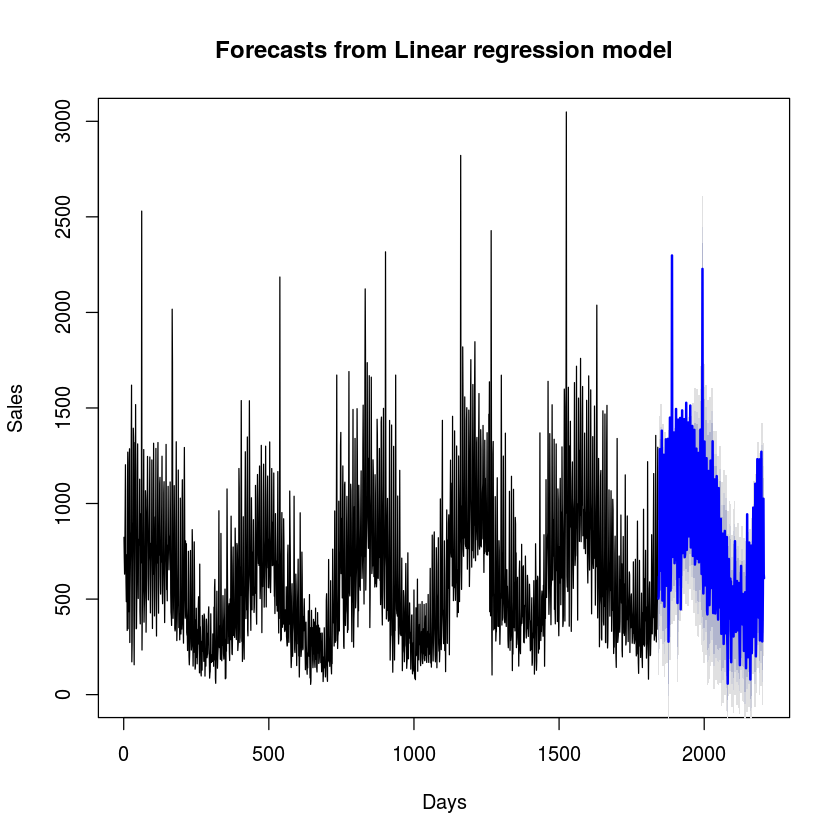

In [45]:
sales2.tslm.pred <-  forecast(sales2.tslm, newdata = xValid2, level = c(80, 90, 98))
accuracy(sales2.tslm.pred, yValid2) 
plot(sales2.tslm.pred, xlab = "Days", ylab = "Sales", ylim = c(0, 3000))

In [60]:
(upper.limits2 <- sales2.tslm.pred$upper[, ])
write.csv(upper.limits2, "Weather_SalesUpperLimits.csv")
mean2.pred <- sales2.tslm.pred$mean
write.csv(mean2.pred, "Weather_SalesMeanPredictions.csv")

1134.13305323072,1233.99125292469,1421.44976305391
1062.29098707829,1162.17253558303,1349.67487719823
1086.56872344846,1186.46463614426,1373.99394289468
963.055600038287,1062.97469570971,1250.54752263255
1174.4982075367,1274.35444122952,1461.80926068891
1174.60319957159,1274.45966459331,1461.91491831419
1221.5336038816,1321.2575916161,1508.46415274123
1277.0201137171,1376.76418722582,1564.0084543112
1316.99363216221,1416.86771703181,1604.35604756001
1365.35130007848,1465.16964684696,1652.55334318964
1233.92766934688,1333.8504627864,1521.43023133347


In [22]:
#Retrain model
#Create time series linear model
yFinal.ts <- ts(y)
(formula <- as.formula(paste("yFinal.ts", paste(c("trend", colnames(x2)), collapse = "+"), sep = "~")))
sales.final.tslm <- tslm(formula, data = x2)
summary(sales.final.tslm)

yFinal.ts ~ trend + JanFri + FebFri + MarFri + AprFri + MayFri + 
    JunFri + JulFri + AugFri + SepFri + OctFri + NovFri + DecFri + 
    JanMon + FebMon + MarMon + AprMon + MayMon + JunMon + JulMon + 
    AugMon + SepMon + OctMon + NovMon + DecMon + JanSat + FebSat + 
    MarSat + AprSat + MaySat + JunSat + JulSat + AugSat + SepSat + 
    OctSat + NovSat + DecSat + JanSun + FebSun + MarSun + AprSun + 
    MaySun + JunSun + JulSun + AugSun + SepSun + OctSun + NovSun + 
    DecSun + JanThu + FebThu + MarThu + AprThu + MayThu + JunThu + 
    JulThu + AugThu + SepThu + OctThu + NovThu + DecThu + JanTue + 
    FebTue + MarTue + AprTue + MayTue + JunTue + JulTue + AugTue + 
    SepTue + OctTue + NovTue + DecTue + JanWed + FebWed + MarWed + 
    AprWed + MayWed + JunWed + JulWed + AugWed + SepWed + OctWed + 
    NovWed + MayJams + AugJams + SepJams


Call:
tslm(formula = formula, data = x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-807.95 -108.42  -15.48   98.03  903.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.918e+02  3.767e+01   5.093 3.84e-07 ***
trend        1.279e-01  6.501e-03  19.673  < 2e-16 ***
JanFri       3.335e+01  5.225e+01   0.638 0.523401    
FebFri       1.967e+02  5.386e+01   3.653 0.000266 ***
MarFri       3.844e+02  5.179e+01   7.422 1.66e-13 ***
AprFri       6.813e+02  5.276e+01  12.912  < 2e-16 ***
MayFri       7.074e+02  5.226e+01  13.535  < 2e-16 ***
JunFri       7.866e+02  5.329e+01  14.761  < 2e-16 ***
JulFri       8.507e+02  5.226e+01  16.279  < 2e-16 ***
AugFri       7.996e+02  5.225e+01  15.302  < 2e-16 ***
SepFri       6.017e+02  5.329e+01  11.291  < 2e-16 ***
OctFri       4.683e+02  5.225e+01   8.961  < 2e-16 ***
NovFri       3.093e+02  5.275e+01   5.863 5.26e-09 ***
DecFri       1.047e+02  5.275e+01   1.985 0.047246 *  
JanMon      -1.220e+02  

In [23]:
#Create test set for predictions
date.test <- as.data.frame(seq(as.Date("2014-04-01"), as.Date("2015-04-01"), by="days"))
date.test$Month <- months(date.test[,1],  abbreviate = TRUE)
date.test$Weekday <- weekdays(date.test[,1],  abbreviate = TRUE)
MonthWeekday.dummies.test <- model.matrix(~ 0 + Month:Weekday, data = date.test)
print(MonthWeekday.dummies.test[1:20, ])

   MonthApr:WeekdayFri MonthAug:WeekdayFri MonthDec:WeekdayFri
1                    0                   0                   0
2                    0                   0                   0
3                    0                   0                   0
4                    1                   0                   0
5                    0                   0                   0
6                    0                   0                   0
7                    0                   0                   0
8                    0                   0                   0
9                    0                   0                   0
10                   0                   0                   0
11                   1                   0                   0
12                   0                   0                   0
13                   0                   0                   0
14                   0                   0                   0
15                   0                   0             

In [24]:
colnames(MonthWeekday.dummies.test) <- gsub("Month", "", colnames(MonthWeekday.dummies.test)) # Remove the "Month" from the column names.
colnames(MonthWeekday.dummies.test) <- gsub(":", "", colnames(MonthWeekday.dummies.test)) # Remove the ":" from the column names.
colnames(MonthWeekday.dummies.test) <- gsub("Weekday", "", colnames(MonthWeekday.dummies.test)) # Remove the "Weekday" from the column names.
print(MonthWeekday.dummies.test[1:20, ])
ncol(MonthWeekday.dummies.test)

   AprFri AugFri DecFri FebFri JanFri JulFri JunFri MarFri MayFri NovFri OctFri
1       0      0      0      0      0      0      0      0      0      0      0
2       0      0      0      0      0      0      0      0      0      0      0
3       0      0      0      0      0      0      0      0      0      0      0
4       1      0      0      0      0      0      0      0      0      0      0
5       0      0      0      0      0      0      0      0      0      0      0
6       0      0      0      0      0      0      0      0      0      0      0
7       0      0      0      0      0      0      0      0      0      0      0
8       0      0      0      0      0      0      0      0      0      0      0
9       0      0      0      0      0      0      0      0      0      0      0
10      0      0      0      0      0      0      0      0      0      0      0
11      1      0      0      0      0      0      0      0      0      0      0
12      0      0      0      0      0   

[1] 84

In [25]:
#Create test set for predictions
test0 <- data.frame(matrix(0, ncol = 14, nrow = 91))
test0[1:30, 4] <- 1
test0[31:61, 5] <- 1
test0[62:90, 6] <- 1
test0[47, 12] <- 1

testA <- cbind(MonthWeekday.dummies.test[1:91,], test0[,12:14])

ncol(testA)

[1] 87

In [26]:
colnames(testA)[85] <- "MayJams"
colnames(testA)[86] <- "AugJams"
colnames(testA)[87] <- "SepJams"

In [27]:
test1 <- testA
test1

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generated

,AprFri,AugFri,DecFri,FebFri,JanFri,JulFri,JunFri,MarFri,MayFri,NovFri,ellip.h,JulWed,JunWed,MarWed,MayWed,NovWed,OctWed,SepWed,MayJams,AugJams,SepJams
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


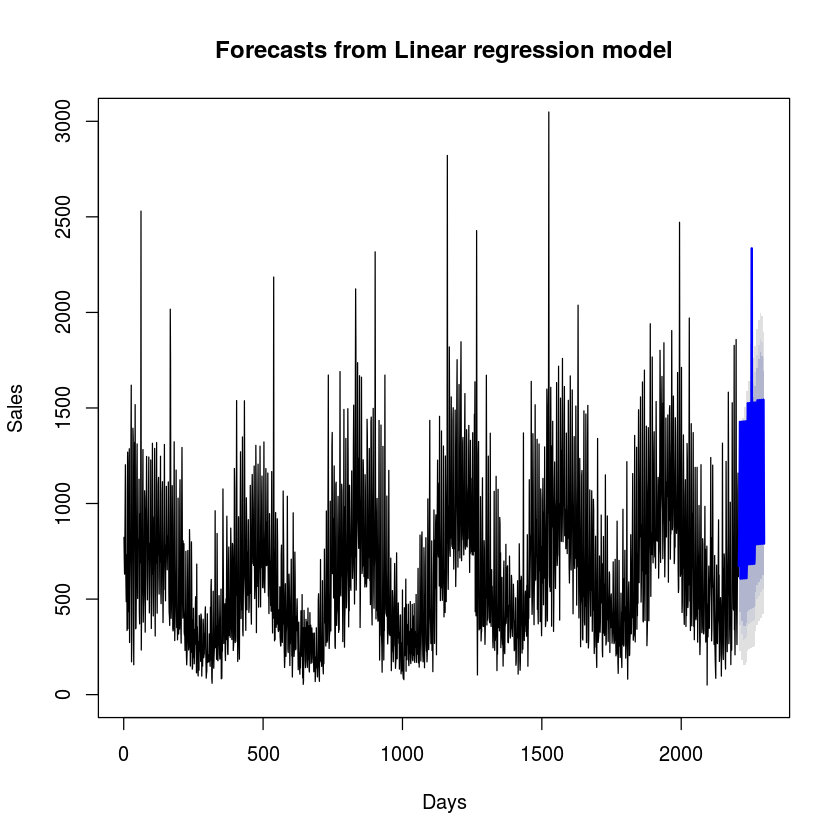

In [28]:
#Build prediction
sales.final.pred <-  forecast(sales.final.tslm, newdata = test1, level = c(80, 90, 98)) 
plot(sales.final.pred, xlab = "Days", ylab = "Sales", ylim = c(0, 3000))

In [29]:
(upper.limits3 <- sales.final.pred$upper[, ])
write.csv(upper.limits3, "Final_SalesUpperLimits2.csv")
mean3.pred <- sales.final.pred$mean
write.csv(mean3.pred, "Final_SalesMeanPredictions2.csv")

925.133122902199,996.334468497847,1129.98291331023
1015.83111607355,1087.03827721745,1220.69763810134
1091.3518367987,1162.55623555617,1296.21041130421
1406.79929617123,1478.00098932445,1611.65008651955
1678.52628514295,1749.77994154426,1883.52657632432
1125.20908816898,1196.46142323545,1330.20557780473
858.305200180038,929.501652496971,1063.14091238335
926.030857439175,997.232899109682,1130.88265048897
1016.72896147258,1087.93685013707,1221.59757661304
1092.24963015321,1163.45474166898,1297.11025529956
1407.69703747521,1478.89942862273,1612.54983598764


# ETS

In [ ]:
# ytrain.ets <- ets(yTrain2)
ytrain.ets.pred <- forecast(ytrain.ets, h = 365)
ytrain.ets

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.0897687,308.3781437,229.4791587,-23.1336110,47.1213302,0.9488980,0.3767052
Test set,-1428.071811,1820.583421,1495.531864,-352.537383,357.219293,6.184035,NA


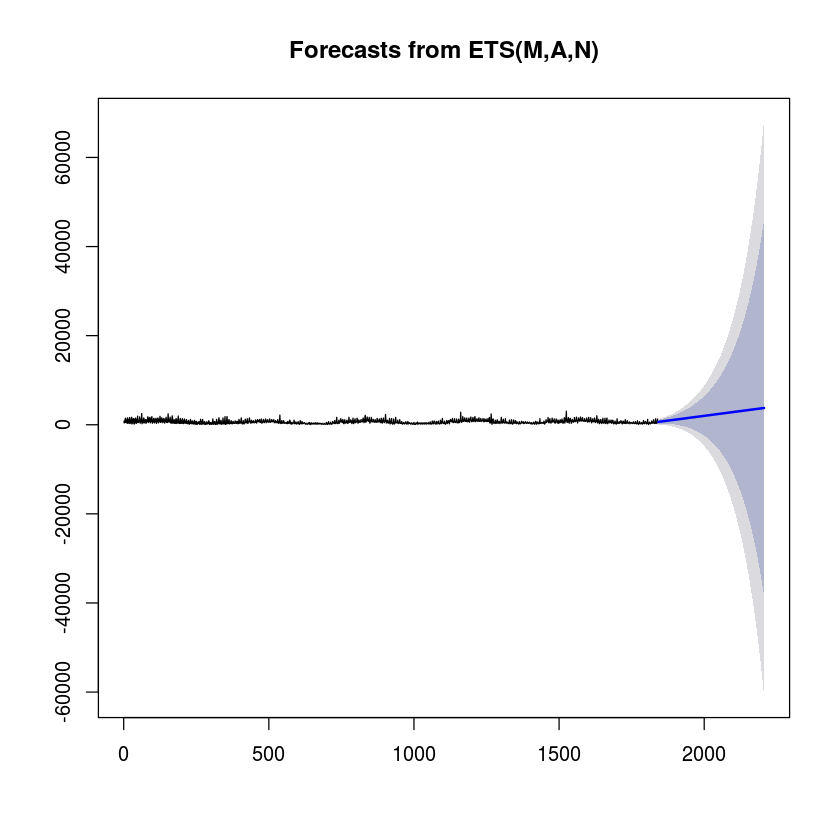

In [66]:
plot(ytrain.ets.pred)
lines(yValid2)
accuracy(ytrain.ets.pred, yValid2)